# H&M Recommender
<img width="1427" alt="image" src="https://kouroshnewyork.com/media/codazon_cache/brand/1200x/wysiwyg/codazon/Brand/banner-cover-HM.jpg" width="800" height="300">

## Data Source
https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations

H&M Group is a family of brands and businesses with 53 online markets and approximately 4,850 stores. Our online store offers shoppers an extensive selection of products to browse through. But with too many choices, customers might not quickly find what interests them or what they are looking for, and ultimately, they might not make a purchase. To enhance the shopping experience, product recommendations are key. More importantly, helping customers make the right choices also has a positive implications for sustainability, as it reduces returns, and thereby minimizes emissions from transportation.

In this competition, H&M Group invites you to develop product recommendations based on data from previous transactions, as well as from customer and product meta data. The available meta data spans from simple data, such as garment type and customer age, to text data from product descriptions, to image data from garment images.

## Dataset Description
For this challenge you are given the purchase history of customers across time, along with supporting metadata. Your challenge is to predict what articles each customer will purchase in the 7-day period immediately after the training data ends. Customer who did not make any purchase during that time are excluded from the scoring.

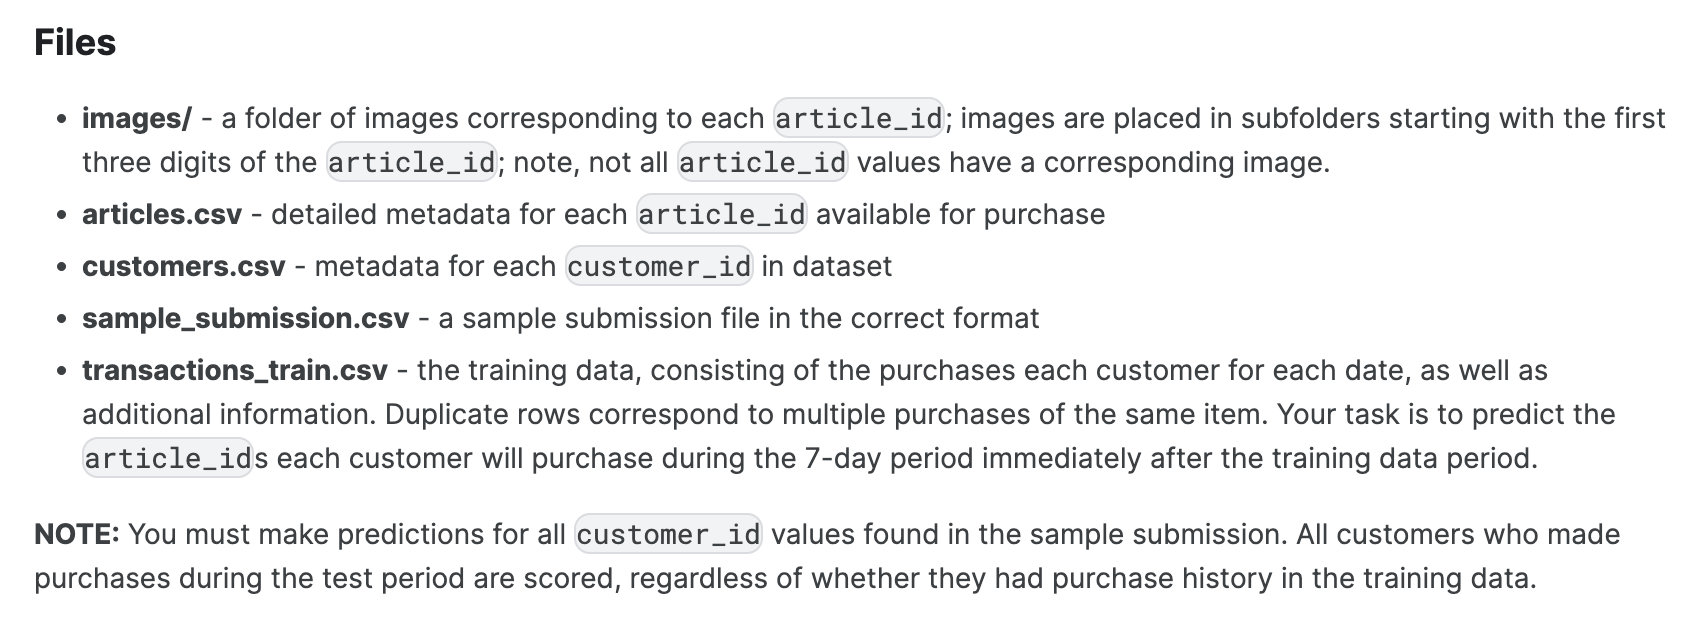

# 1. EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
articles = pd.read_csv('data/articles.csv')
customers = pd.read_csv('data/customers.csv')
submission = pd.read_csv('data/sample_submission.csv')
transactions = pd.read_csv('data/transactions_train.csv')

In [3]:
#Write a function to explore data
def explore_data(df):
    print('Shape: ', df.shape)
    return df.head()

In [4]:
explore_data(articles)

Shape:  (105542, 25)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [5]:
explore_data(customers)

Shape:  (1371980, 7)


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [6]:
explore_data(submission)

Shape:  (1371980, 2)


,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


In [7]:
explore_data(transactions)

Shape:  (31788324, 5)


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


# 1.1 EDA (Article)

This dataset contains the meta data for all h&m articles with details such as a type of product, a color, a product group and other features.
## Features
article_id: id of product


In [8]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [9]:
#Check for null values
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [10]:
#Check for duplicated rows in articles
articles.duplicated().sum()

0

Noticed that there are a variety of categories like:
- product type
- department
- index
- section
- garment group

Let's explore all the categories

### Product Type

In [30]:
articles["product_group_name"].value_counts()

Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear                 5490
Shoes                     5283
Swimwear                  3127
Socks & Tights            2442
Nightwear                 1899
Unknown                    121
Underwear/nightwear         54
Cosmetic                    49
Bags                        25
Items                       17
Furniture                   13
Garment and Shoe care        9
Stationery                   5
Interior textile             3
Fun                          2
Name: product_group_name, dtype: int64

In [11]:
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name   product_type_name
Accessories          Accessories set         7
                     Alice band              6
                     Baby Bib                3
                     Bag                  1280
                     Beanie                 56
                                          ... 
Underwear            Underwear corset        7
                     Underwear set          47
Underwear/nightwear  Sleep Bag               6
                     Sleeping sack          48
Unknown              Unknown               121
Name: article_id, Length: 132, dtype: int64

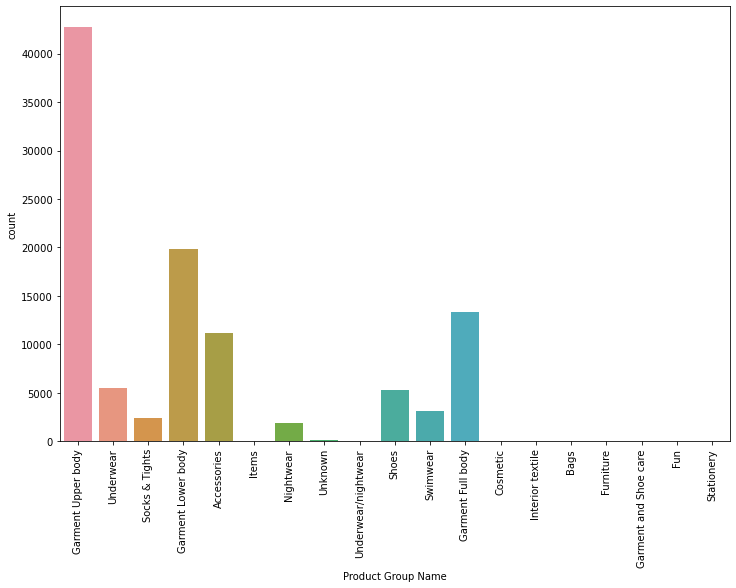

In [34]:
#Plot a distribution of the number of articles per product group
plt.figure(figsize=(12, 8))
sns.countplot(x='product_group_name', data=articles)
plt.xticks(rotation=90)
plt.xlabel('Product Group Name')
plt.show()



In [105]:
def new_func():
    articles.groupby(['index_group_name', 'index_name']).count()['article_id']

new_func()

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

In [106]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

In [107]:
articles["index_name"].value_counts()

Ladieswear                        26001
Divided                           15149
Menswear                          12553
Children Sizes 92-140             12007
Children Sizes 134-170             9214
Baby Sizes 50-98                   8875
Ladies Accessories                 6961
Lingeries/Tights                   6775
Children Accessories, Swimwear     4615
Sport                              3392
Name: index_name, dtype: int64

In [108]:
articles["index_group_name"].value_counts()

Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64

In [109]:
articles["index_group_no"].value_counts()

1     39737
4     34711
2     15149
3     12553
26     3392
Name: index_group_no, dtype: int64

Each of the items in the "index_group_name" column is denoted by the numbers 1,2,3,4,26

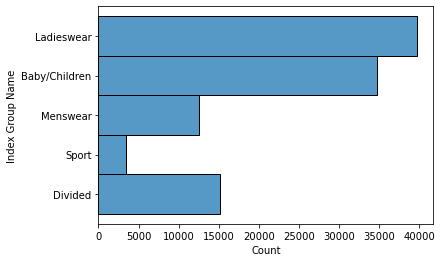

In [110]:
#Plot a distribution on the "index_group_name" column
ax = sns.histplot(data = articles, y = "index_group_name")
ax.set_xlabel("Count")  
ax.set_ylabel("Index Group Name")
plt.show()


Ladies wear contains the most number of product, followed by Baby/Children

In [111]:
articles["section_name"].unique()

array(['Womens Everyday Basics', 'Womens Lingerie',
       'Womens Nightwear, Socks & Tigh', 'Baby Essentials & Complements',
       'Men Underwear', 'Mama', 'Womens Small accessories',
       'Men H&M Sport', 'Kids Boy', 'Divided Basics',
       'Girls Underwear & Basics', 'Mens Outerwear',
       'Womens Big accessories', 'Divided Accessories',
       'Womens Swimwear, beachwear', 'Divided Selected',
       'Boys Underwear & Basics', 'Contemporary Street',
       'Contemporary Casual', 'Men Accessories', 'Men Suits & Tailoring',
       'Womens Everyday Collection', 'Men Shoes', 'Young Boy', 'H&M+',
       'Divided Collection', 'Ladies Denim', 'Contemporary Smart',
       'Womens Trend', 'Kids Outerwear', 'Young Girl', 'Womens Shoes',
       'Womens Tailoring', 'Divided Projects', 'Denim Men', 'Men Other',
       'Womens Jackets', 'Men Other 2', 'Baby Boy', 'Womens Casual',
       'Kids Accessories, Swimwear & D', 'Ladies H&M Sport',
       'Kids & Baby Shoes', 'Baby Girl', 'Kids Girl

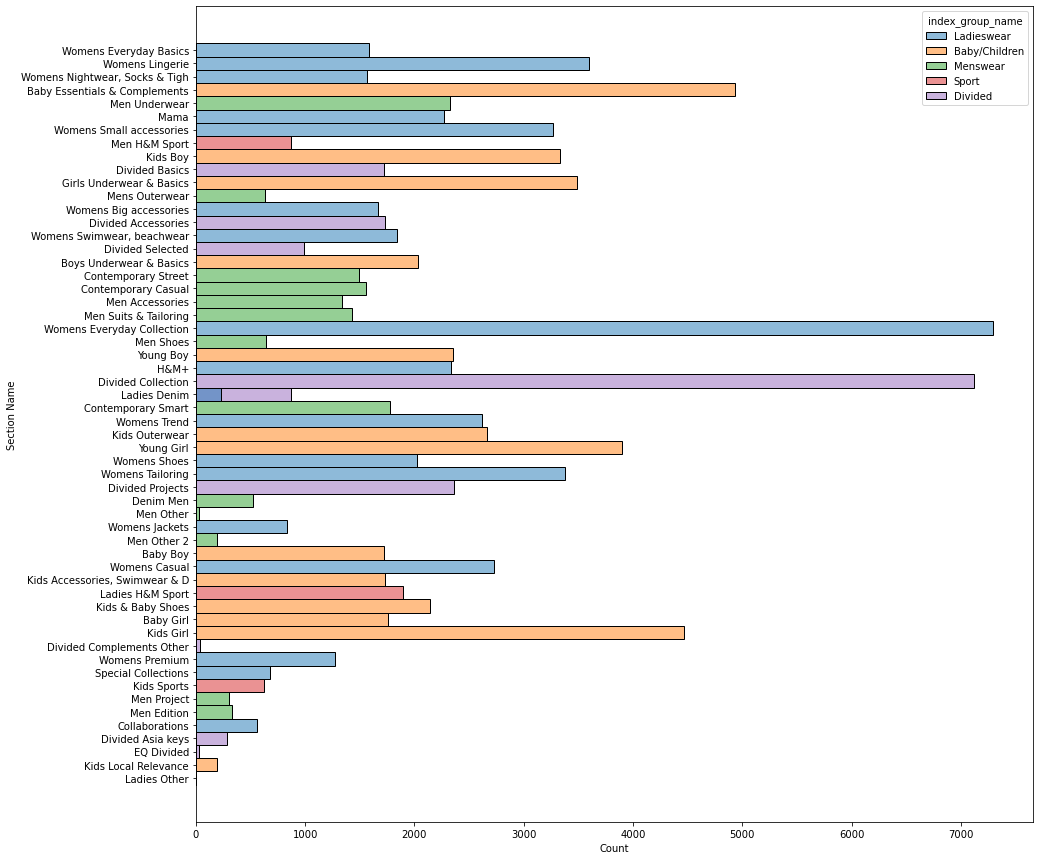

In [112]:
#Plot a distribution on the "section_name" column
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.histplot(data = articles, y = "section_name", hue = "index_group_name")
ax.set_xlabel("Count")  
ax.set_ylabel("Section Name")
plt.show()

In [113]:
#Viewing the top 10 value counts for the "section_name" column
articles["section_name"].value_counts().head(10)

Womens Everyday Collection       7295
Divided Collection               7124
Baby Essentials & Complements    4932
Kids Girl                        4469
Young Girl                       3899
Womens Lingerie                  3598
Girls Underwear & Basics         3490
Womens Tailoring                 3376
Kids Boy                         3328
Womens Small accessories         3270
Name: section_name, dtype: int64

Top 5 in section in terms of value count
- Womens Everyday Collection
- Divided Collection
- Baby Essentials & Complements
- Kids Girl
- Young Girl

It is observed that in the top 10 value count in the section category, majority of them are tailored to female audiences

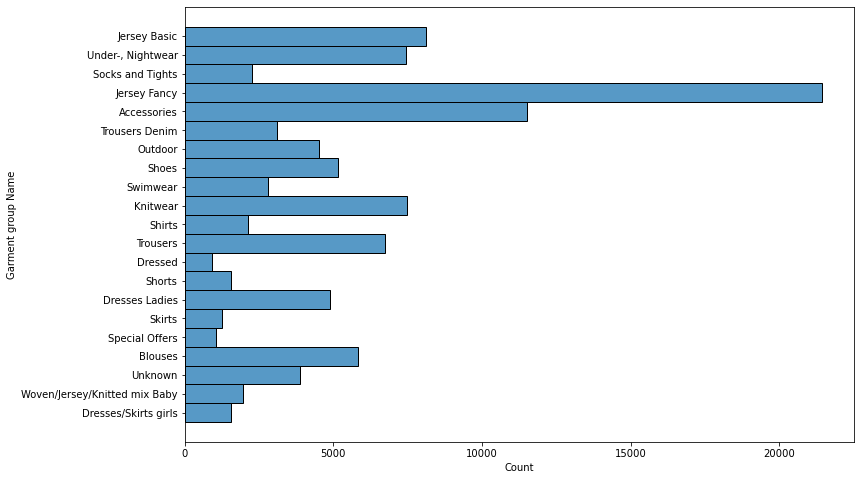

In [114]:
#Plot a distribution on the "garment_group_name" column
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.histplot(data = articles, y = "garment_group_name") #hue = "index_group_name"
ax.set_xlabel("Count")  
ax.set_ylabel("Garment group Name")
plt.show()

In [115]:
# Top 5 Value count for the column "garment_group_name
articles["garment_group_name"].value_counts().head()

Jersey Fancy         21445
Accessories          11519
Jersey Basic          8126
Knitwear              7490
Under-, Nightwear     7441
Name: garment_group_name, dtype: int64

# 1.2 EDA(Customers)

Here we will perform the EDA and feature engineering for "Customers" dataset

In [18]:
print(customers.shape)
customers.head()

(1371980, 7)


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [16]:
customers["postal_code"][0]

'52043ee2162cf5aa7ee79974281641c6f11a68d276429a91f8ca0d4b6efa8100'

In [17]:
customers.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


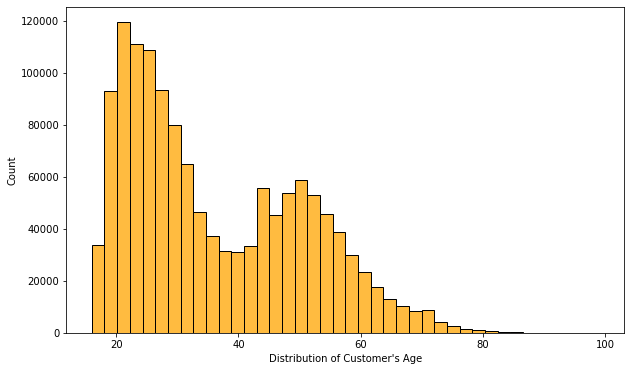

In [29]:
#Plot a distribution on customer's age
plt.figure(figsize=(10, 6))
ax = sns.histplot(data = customers, x = "age", bins = 40, color="orange")
ax.set_xlabel("Distribution of Customer's Age")
ax.set_ylabel("Count")
plt.show()


Most common age group of customers ranges: 20-26 

# 1.3 EDA(Transactions)

In [35]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [44]:
#Customer who bought the most items
transactions["customer_id"].value_counts().head()

be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
Name: customer_id, dtype: int64

In [46]:
#Most sold items online
transactions["article_id"].value_counts()).head()

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
             ...  
753737001     9723
762846001     9663
685813001     9579
716672001     9394
599580055     9387
Name: article_id, Length: 100, dtype: int64

In [43]:
#Find what is the article_id with the number 706016001 from the article dataset
articles[articles["article_id"] == 706016001]


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
53892,706016001,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,Black,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...


In [50]:
#Dataframe that shows the number of items bought by each customer
transactions.groupby("customer_id").count()["article_id"]


customer_id
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657    21
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa    86
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318    18
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e     2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a    13
                                                                    ..
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831    51
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7    84
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264    45
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a     7
ffffd9ac14e89946416d80e791d064701994755c3ab686a1eaf3458c36f52241     1
Name: article_id, Length: 1362281, dtype: int64